In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from itertools import product
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error as MAPE
get_ipython().run_line_magic('matplotlib', 'inline')

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

sns.set_style('white')
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
test_data = pd.read_csv("C:/Users/anita/OneDrive/Desktop/IPBA/Energy_Demand/energy_demand.csv")
test_data.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [4]:
test_data.columns #all the columns

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')

In [5]:
test_data.nunique() #Count number of distinct elements

date               2106
demand             2106
RRP                2106
demand_pos_RRP     2106
RRP_positive       2106
demand_neg_RRP      192
RRP_negative        179
frac_at_neg_RRP      21
min_temperature     211
max_temperature     283
solar_exposure      316
rainfall            105
school_day            2
holiday               2
dtype: int64

In [6]:
test_data.isnull().sum() #Checking for NULL values

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [7]:
test_data = test_data.dropna() #Removing missing values
test_data.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

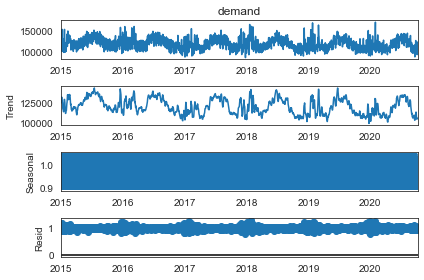

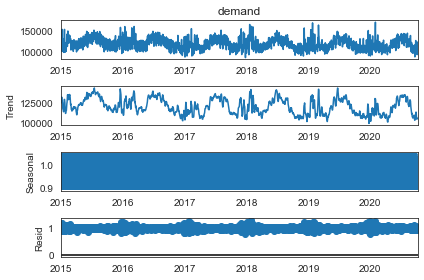

In [15]:
test1 = pd.read_csv("C:/Users/anita/OneDrive/Desktop/IPBA/Energy_Demand/energy_demand.csv",
                       index_col ='date',
                       parse_dates = True)
  
# Print the first five rows of the dataset
test1.head()
  
# ETS Decomposition
result = seasonal_decompose(test1['demand'], 
                            model ='multiplicative')
result.plot()

In [16]:
stepwise_fit = auto_arima(test1['demand'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.03 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=46780.773, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=45671.609, Time=0.83 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.95 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=46778.856, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=46180.740, Time=0.29 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=45365.221, Time=2.14 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=11.70 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.04 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=46190.255, Time=2.67 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=45115.981, Time=2.44 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=45259.728, Time=1.20 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.82 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.54 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2106
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood              -22383.114
Date:                             Wed, 31 Aug 2022   AIC                          44784.229
Time:                                     14:34:09   BIC                          44835.050
Sample:                                 01-01-2015   HQIC                         44802.846
                                      - 10-06-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -13.6506    921.852     -0.015      0.988   -1820.447    1793.146
ar.L1          0.2466      0.019     13.216      0.000       0.210       0.283
ar.L2         -0.6908      0.008    -82.847      0.000      -0.707      -0.674
ar.L3          0.6897      0.018     37.282      0.000       0.653       0.726
ma.L1          0.4404      0.010     43.829      0.000       0.421       0.460
ma.L2          0.9687      0.010    100.437      0.000       0.950       0.988
ar.S.L12      -0.5122      0.026    -19.404      0.000      -0.564      -0.460
ar.S.L24      -0.5090      0.025    -20.605      0.000      -0.557      -0.461
sigma2      1.683e+08      0.020   8.55e+09      0.000    1.68e+08    1.68e+08
===================================================================================
Ljung-Box (L1) (Q):                  52.40   Jarque-Bera (JB):               213.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.28
Prob(H) (two-sided):                  0.85   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.16e+24. Standard errors may be unstable.
"""

In [17]:

# Split data into train / test sets
train = test1.iloc[:len(test1)-12]
test = test1.iloc[len(test1)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['demand'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             demand   No. Observations:                 2094
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood              -22270.466
Date:                            Wed, 31 Aug 2022   AIC                          44550.932
Time:                                    14:36:18   BIC                          44579.135
Sample:                                01-01-2015   HQIC                         44561.267
                                     - 09-24-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1029      0.022      4.653      0.000       0.060       0.146
ar.S.L12      -0.2305      0.017    -13.239      0.000      -0.265      -0.196
ar.S.L24      -0.1525      0.019     -8.037      0.000      -0.190      -0.115
ma.S.L12      -1.0000      0.024    -41.114      0.000      -1.048      -0.952
sigma2      1.124e+08   2.17e-10   5.19e+17      0.000    1.12e+08    1.12e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.59   Jarque-Bera (JB):               189.89
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.12
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.64e+32. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

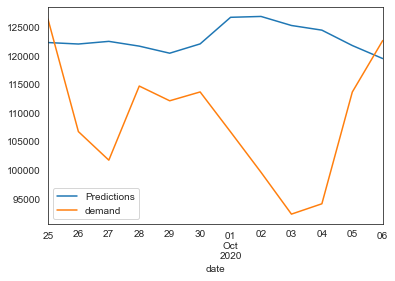

In [18]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['demand'].plot(legend = True)

In [19]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test["demand"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["demand"], predictions)

341150046.29613876

<AxesSubplot:xlabel='date'>

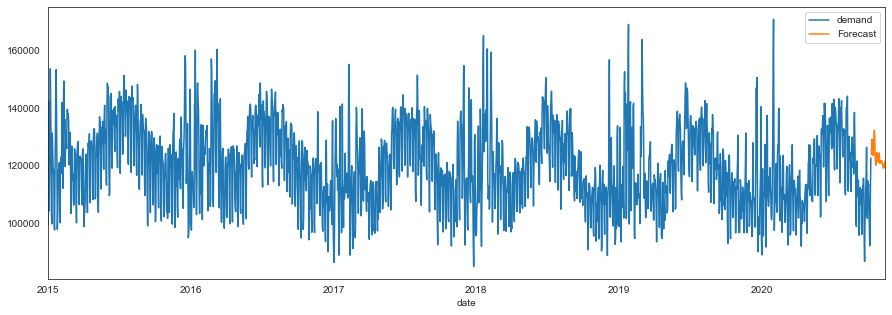

In [26]:
# Train the model on the full dataset
model = SARIMAX(test1['demand'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(test1), 
                          end = (len(test1)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
test1['demand'].plot(figsize = (15, 5), legend = True)
forecast.plot(legend = True)